# Import Libraries

In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

%matplotlib inline

## Loaing data set

In [85]:
car_df = pd.read_csv(r'C:\\Users\\Benai\\Documents\\machin-learning\\knn\\car.data')

In [86]:
# printing the shape of the database
car_df.shape

(1727, 7)

In [87]:
# print the firedst five row of the data base
car_df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [88]:
# change the column name
car_df = car_df.rename(columns={'vhigh': 'buying', 'vhigh.1' :'maint', '2' :'doors', '2.1'  :'persons', 'small'  :'lug_boot', 'low' :'safety', 'unacc' :'class'})

In [89]:
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [90]:
# print some few imformation about database
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [91]:
# print descriptive statistic on numerical columns
car_df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,3,more,big,med,unacc
freq,432,432,432,576,576,576,1209


In [92]:
# check missing values
car_df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [93]:
# set the predictor and target variable

x =  car_df.drop('class', axis=1)
y = car_df['class']

In [94]:
x.shape, y.shape

((1727, 6), (1727,))

In [95]:
# convert predictor to categorical variabel to numeric

x = x.apply(LabelEncoder().fit_transform)

In [96]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [97]:
# convert target to categorical variabel to numeric

y = LabelEncoder().fit_transform(y)

y

array([2, 2, 2, ..., 2, 1, 3])

In [98]:
# check the data type

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1727 non-null   int32
 1   maint     1727 non-null   int32
 2   doors     1727 non-null   int32
 3   persons   1727 non-null   int32
 4   lug_boot  1727 non-null   int32
 5   safety    1727 non-null   int32
dtypes: int32(6)
memory usage: 40.6 KB


In [99]:
# Train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [100]:
# model training and fitting

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)

In [101]:
y_predict

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 3, 0, 1, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3,
       2, 2, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 2, 3, 0, 2, 0, 2, 0, 0,
       3, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 2, 0,

In [102]:
# how many miss classified
count_missclassified = (y_test != y_predict).sum()

print('Miss classified: ',count_missclassified)

Miss classified:  38


In [118]:
print('Accuracy score: ', accuracy_score(y_test, y_predict))

Accuracy score:  0.7716763005780347


In [120]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.34      0.46        77
           1       0.00      0.00      0.00        15
           2       0.78      1.00      0.87       237
           3       1.00      0.24      0.38        17

    accuracy                           0.77       346
   macro avg       0.62      0.39      0.43       346
weighted avg       0.74      0.77      0.72       346



C:\Users\Benai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
# check the k value from 1 to 25

k_fold = range(1, 25)

# print score
score = []

for k in k_fold:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    score.append(accuracy_score(y_test, y_predict))
    
    print(k, '--->',accuracy_score(y_test, y_predict))

1 ---> 0.8063583815028902
2 ---> 0.7630057803468208
3 ---> 0.8583815028901735
4 ---> 0.8583815028901735
5 ---> 0.8901734104046243
6 ---> 0.8901734104046243
7 ---> 0.9075144508670521
8 ---> 0.8959537572254336
9 ---> 0.869942196531792
10 ---> 0.8439306358381503
11 ---> 0.8410404624277457
12 ---> 0.8236994219653179
13 ---> 0.8034682080924855
14 ---> 0.8063583815028902
15 ---> 0.7947976878612717
16 ---> 0.7890173410404624
17 ---> 0.791907514450867
18 ---> 0.8005780346820809
19 ---> 0.7890173410404624
20 ---> 0.7890173410404624
21 ---> 0.7832369942196532
22 ---> 0.7716763005780347
23 ---> 0.7774566473988439
24 ---> 0.7716763005780347


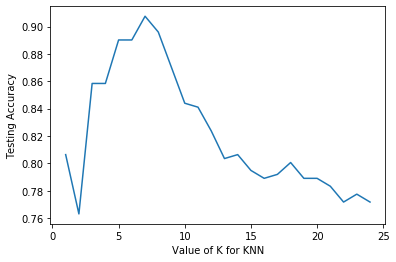

In [114]:
plt.plot(k_fold, score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

## we can choose k = 7 which give us highest accuracy